# Skewness and Kurtosis

**Skewness:**

$$ S(R) = \frac{E[(R-E(R))^3]}{\sigma_R^3} $$

**Kurtosis:**

$$ K(R) = \frac{E[(R-E(R))^4]}{\sigma_R^4} $$

In regards to Kurtosis, the standard normal would be 3. When we minus 3 off Kurtosis to get the normal as 0, the Kurtosis is called Excess Kurtosis.

The **skewness** measures whether the returns are skewed right (positive) or left (negative). 
<br>
A right skew means the majority of the returns are less than the average returns; the median and mode are both less than the mean.
<br>
A left skew means the majority of the returns are more than the average returns; the median and mode are both more than the mean.

The **kurtosis** measures the extremities of returns. 
<br>
So, imagine a normal distribution curve. The curve can be 3 type: a very thin and pointy type, a normal type, and a lower and "fatter" type. In kurtosis, these three types are called: 
<br>
**Leptokurtic** kurtosis - the thin and pointy one - lepto comes from the Greek word leptos meaning thin (_fun fact: leptocephalic means small and narrow skull_).
<br>
**Mesokurtic** kurtosis - the normal type that roughly resembles a normal distribution - meso comes from the Greek word mesos meaning middle (_fun fact: mesoblast means the middle germinal layer of an embryo in its early stages_).
<br>
**Platykurtic** kurtosis - shorter and broader - platy comes from the Greek word platus meaning broad and flat (_fun fact: platybasia means the flattening of the skull_).

There are two ways we can calculate the skewness and kurtosis: to calculate it ourselves by writing the functions out from scratch, or importing a new package (which is used a lot for statistics) to calculate it.

We'll do it in both methods.

Again, let's start with first importing some of what we've done already:

In [33]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Assets
n = int(input('Please input the number of tickers you want to look at: '))
tickers = []
for i in range(0, n):
    ticker = input(f'Please input ticker {i+1}: ')
    tickers.append(ticker.upper())
print('The tickers you are have chosen are: ', tickers)

# Timeframe
start = '2018-07-01'
end = '2021-07-01'

# Portfolio Returns Data
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in tickers:
    portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()

Please input the number of tickers you want to look at:  4
Please input ticker 1:  tsla
Please input ticker 2:  aapl
Please input ticker 3:  jpm
Please input ticker 4:  wmt


The tickers you are have chosen are:  ['TSLA', 'AAPL', 'JPM', 'WMT']


In [34]:
def skew(returns):
    # The def at the front means define and is typically used to define a function which would be the word skew that follows.
    # The word can be whatever, but it is best that it is not the same as a Python built in function otherwise we'll start
    # getting errors, as our definitions of functions will replace them.

    # The definition function has to return something that is returned back after we run the function.
    # An example can be the sum function, the values inside the sum function are summated and that summated value is returned.
    # We can take that concept and apply a much more complex formula to it and return the result of the formula.
        # Also, like we have seen previously with the plt.subplots() function, we can return more than 1 item.
    # The item we return does not have to be a single item, it can be a list, a dataframe, dictionary, integer, etc. 
        # Whatever you want to return.

    # We can also enter whatever parameters we want in the parenthesis, and we can name it whatever we want.
    # We have simply named the parameters returns here, but we can name it to anything.
    # We will see more examples of this later on.

    demeaned_returns = returns - returns.mean()
    # We find the difference between the returns and the mean of the returns - differencing.
    
    sigma = returns.std(ddof=0)
    # We find the standard deviation of the returns and find the standard deviation with 0 degrees of freedom.
    
    exponential = (demeaned_returns**3).mean()
    # We then calculate the differencing to the power of 3 (cubed) and then take the mean of those values.
    # Taking powers is done by two **.
    
    return exponential/sigma**3
    # We return the value that is produced upon dividing the two variables.
    
def kurt(returns, fisher=True):
    # Here we have the kurtosis function, that we have defined as kurt.
    # The parameters here include returns and fisher which we have set to be True by default.
    # Again, we have named the fisher parameter as something that we deemed appropriate, but again this could have
    # been named as anything, as long as it doesn't begin with a number.
    
    demeaned_returns = returns - returns.mean()
    # This is the same differencing that is done with the skewness.
    
    sigma = returns.std(ddof=0)
    # Taking standard deviations with 0 degrees of freedom.
    
    exponential = (demeaned_returns**4).mean()
    # This is the same with the skewness but instead we take it to the power of 4 rather than 3.
    
    if fisher==True:
    # Now we can set the condition of what happens when our parameter is set to be True.
    
        return exponential/sigma**4 - 3
    
    else:
    # The else statement here would be the alternative, which can only mean when the fisher parameter is set to False.
    
        return exponential/sigma**4
    
skewness = skew(portfolio_returns.mean())
print(skewness)
kurtosis = kurt(portfolio_returns.mean())
print(kurtosis)
# The kurtosis we get is called the Excess Kurtosis, which is what is typically used - which takes away 3 off the result.
# To get the normal kurtosis, we can apply our parameter to say we don't want the Fisher transformed excess kurtosis:
# kurt = kurt(portfolio_returns.mean(), fisher=False)

0.6443654551546906
-1.188745230188851


In [35]:
import scipy.stats
# Alternatively, we can just import scipy.stats and find the skewness and kurtosis with their built in functions.

skewness = scipy.stats.skew(portfolio_returns.mean())
kurtosis = scipy.stats.kurtosis(portfolio_returns.mean())
# This gives us the skewness and kurtosis of our entire portfolio.
# We have to use mean so that we're only looking at 1 value for each date.
# We will demonstrate below how this works for each of the assets in our portfolio

# NOTE: Since we have re-defined skew and kurt, they will now replace the functions we created earlier on.

print(skewness)
print(kurtosis)

0.6443654551546907
-1.1887452301888506


Looking at our own method and the method provided by scipy.stats, and that there are very little discrepencies - accurate to 15 decimal places and only becomes inaccurate because scipy keeps the values only up to 15 dps, othwerwise our calculation is more accurate by one extra decimal place.

Now that we have the skewness and kurtosis, we can assess whether the returns of our data follow a normal distribution.

We can do this by looking at the Jaque Bera test for normality, which gives us a test statistic for us to then input into a Chi-Squared distribution to find the p-value and determine its normality.

## Jaque-Bera's Test for Normality

$$ JarqueBera = \frac {n}{6} (S^2 + \frac {1}{4} (K - 3)^2) $$

In [36]:
def jarque_bera_test(returns):
    return len(returns) * ((skew(returns)**2) + (kurt(returns)**2 / 4)) / 6
# Now we use the Jarque-Bera's test for normality using the skewness and kurtosis we have calculated.
# The formula is given above

# We can write the formula ourselves, or we can use the already given function that exists with the Scipy.stats module.
# We shall do both, and the above is simply how we write it ourselves.
# We write it as a function so the forumla can be quickly applied to our input data, rather than writing the data out
# each time.

jb = jarque_bera_test(portfolio_returns.mean())
# We input our returns data into the test to see if our returns follow a normal distribution.

jb

0.5123237635805985

In [37]:
jb = scipy.stats.jarque_bera(portfolio_returns.mean())
# This is the alternative method of doing the Jarque-Bera test.
# However, if you notice the input the value, we have the mean of returns instead of just returns.

jb
# The convenience of using this is that we immediately get the test statistic and p-value.

(0.5123237635805983, 0.7740166594473187)

Now let's find the test statistic.
<br>
To do this we will have to use the scipy.stats package:

In [38]:
scipy.stats.distributions.chi2.pdf(jarque_bera_test(portfolio_returns), 2)

array([9.28138895e-151, 4.58021364e-257, 0.00000000e+000, 0.00000000e+000])

Let's summarise what we've done and put all this in a dataframe.

In [39]:
# Skewness
def skew(returns):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**3).mean()
    return exponential/sigma**3

#Kurtosis
def kurt(returns, fisher=True):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**4).mean()
    if fisher==True:
        return exponential/sigma**4 - 3
    else:
        return exponential/sigma**4
    
# Jarque-Bera Normality Test
def jarque_bera_test(returns):
    return len(returns) * ((skew(returns)**2) + (kurt(returns)**2 / 4)) / 6

In [40]:
summary = pd.DataFrame({
    'Mean': portfolio_returns.mean(),
    'Median': portfolio_returns.median(),
    'Minimum': portfolio_returns.min(),
    'Maximum': portfolio_returns.max(),
    'Volatility': portfolio_returns.std(),
    'Observations': len(portfolio_returns),
    'Skewness': (skew(portfolio_returns)).round(5),
    'Excess Kurtosis': (kurt(portfolio_returns, fisher=True)).round(5),
    'Jarque-Bera': (jarque_bera_test(portfolio_returns)).round(5),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(portfolio_returns), 2)).round(5)
})
print('\nFor P-Value less than 0.01 (1%) we reject the null hypothesis of the Jarque-Bera test - that the sample follows a normal distribution.\n')
summary


For P-Value less than 0.01 (1%) we reject the null hypothesis of the Jarque-Bera test - that the sample follows a normal distribution.



,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
TSLA Returns,0.000623,0.000340,-0.043781,0.041395,0.009146,756,-0.03721,4.67809,689.53838,0.0
AAPL Returns,0.000353,0.000402,-0.032564,0.027494,0.005326,756,-0.38955,6.06834,1179.09895,0.0
JPM Returns,0.000148,0.000147,-0.035321,0.037438,0.004883,756,0.03516,14.10556,6267.61118,0.0
WMT Returns,0.000165,0.000059,-0.020182,0.023851,0.003096,756,1.09546,13.88929,6227.94200,0.0


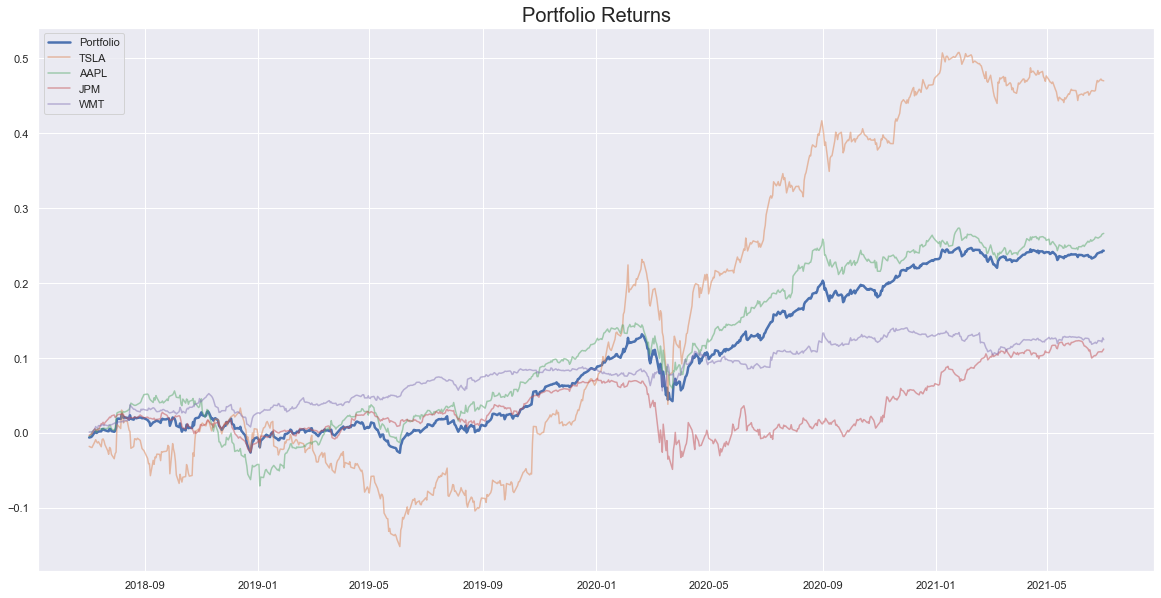

In [60]:
pf_average = portfolio_returns.mean(axis=1)
# Now let's look at the portfolio as a whole.
# Notice how we have added a field in the mean() function of axis=1.
# This gives us the mean of each individual row and hence the portfolio average returns

# Let's look at how the portfolio performed compared to each individual asset:
plt.figure(figsize=(20,10))
plt.plot(pf_average.cumsum(), label = 'Portfolio', lw=2.5)
# The lw here gives us the linewidth and takes any float value

for ticker in tickers:
    plt.plot(portfolio_returns[f'{ticker} Returns'].cumsum(), label=f'{ticker}', alpha=0.5)
plt.title('Portfolio Returns', fontsize=20)
plt.legend()
plt.show();

In [44]:
pf_av_df = {
    'Mean': pf_average.mean(),
    'Median': pf_average.median(),
    'Minimum': pf_average.min(),
    'Maximum': pf_average.max(),
    'Volatility': pf_average.std(),
    'Observations': len(pf_average),
    'Skewness': (skew(pf_average)),
    'Excess Kurtosis': (kurt(pf_average, fisher=True)),
    'Jarque-Bera': (jarque_bera_test(pf_average)),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(pf_average), 2))
}
# Now let's copy and paste the same test information from the previous code for the new portfolio average variable.
# What is changed is that instead of using the portfolio_returns variable, we use the pf_average variable instead.

summary.loc['Portfolio Average Returns'] = pf_av_df
# To add a new row, the concept is very similar to adding a new column except we call the loc[] function on the
# dataframe, instead of just calling a square brackets, which is what we would do if we wanted to add a new column.

# If the name of the row is already defined, then Python will replace the original data in that row, but it will
# not duplicate and add a new row.

summary

,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
TSLA Returns,0.000623,0.000340,-0.043781,0.041395,0.009146,756,-0.037210,4.678090,689.538380,0.0
AAPL Returns,0.000353,0.000402,-0.032564,0.027494,0.005326,756,-0.389550,6.068340,1179.098950,0.0
JPM Returns,0.000148,0.000147,-0.035321,0.037438,0.004883,756,0.035160,14.105560,6267.611180,0.0
WMT Returns,0.000165,0.000059,-0.020182,0.023851,0.003096,756,1.095460,13.889290,6227.942000,0.0
Portfolio Average Returns,0.000322,0.000503,-0.031447,0.021258,0.004101,756,-0.768414,9.253169,2771.463487,0.0


In [61]:
# In summary of what we've done:

# Skewness
def skew(returns):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**3).mean()
    return exponential/sigma**3

#Kurtosis
def kurt(returns, fisher=True):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**4).mean()
    if fisher==True:
        return exponential/sigma**4 - 3
    else:
        return exponential/sigma**4
    
# Jarque-Bera Normality Test
def jarque_bera_test(returns):
    return len(returns) * ((skew(returns)**2) + (kurt(returns)**2 / 4)) / 6

summary = pd.DataFrame({
    'Mean': portfolio_returns.mean(),
    'Median': portfolio_returns.median(),
    'Minimum': portfolio_returns.min(),
    'Maximum': portfolio_returns.max(),
    'Volatility': portfolio_returns.std(),
    'Observations': len(portfolio_returns),
    'Skewness': (skew(portfolio_returns)).round(5),
    'Excess Kurtosis': (kurt(portfolio_returns, fisher=True)).round(5),
    'Jarque-Bera': (jarque_bera_test(portfolio_returns)).round(5),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(portfolio_returns), 2)).round(5)
})

pf_average = portfolio_returns.mean(axis=1)
pf_av_df = {
    'Mean': pf_average.mean(),
    'Median': pf_average.median(),
    'Minimum': pf_average.min(),
    'Maximum': pf_average.max(),
    'Volatility': pf_average.std(),
    'Observations': len(pf_average),
    'Skewness': (skew(pf_average)),
    'Excess Kurtosis': (kurt(pf_average, fisher=True)),
    'Jarque-Bera': (jarque_bera_test(pf_average)),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(pf_average), 2))
}
summary.loc['Portfolio Average Returns'] = pf_av_df
summary

,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
TSLA Returns,0.000623,0.000340,-0.043781,0.041395,0.009146,756,-0.037210,4.678090,689.538380,0.0
AAPL Returns,0.000353,0.000402,-0.032564,0.027494,0.005326,756,-0.389550,6.068340,1179.098950,0.0
JPM Returns,0.000148,0.000147,-0.035321,0.037438,0.004883,756,0.035160,14.105560,6267.611180,0.0
WMT Returns,0.000165,0.000059,-0.020182,0.023851,0.003096,756,1.095460,13.889290,6227.942000,0.0
Portfolio Average Returns,0.000322,0.000503,-0.031447,0.021258,0.004101,756,-0.768414,9.253169,2771.463487,0.0
